In [1124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, LSTM,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras import optimizers
import time


In [1125]:
def creat_dataset(dataset, look_back=1):  # look_back表示用当前项的前look_back项预测当前1项
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)


In [1126]:
dataframe = pd.read_excel('updatedDataset.xlsx',sheet_name = 'BTC-USD')
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...,...
1457,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
1458,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
1459,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
1460,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400


In [1127]:
dataframe1 = dataframe.iloc[:,[0,4]]

In [1128]:
dataframe1

,Date,Close
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000
...,...,...
1457,2021-12-28,47588.855469
1458,2021-12-29,46444.710938
1459,2021-12-30,47178.125000
1460,2021-12-31,46306.445313


In [1129]:
dataset1 = dataframe1.values
dataset1

array([[Timestamp('2018-01-01 00:00:00'), 13657.200195],
       [Timestamp('2018-01-02 00:00:00'), 14982.099609],
       [Timestamp('2018-01-03 00:00:00'), 15201.0],
       ...,
       [Timestamp('2021-12-30 00:00:00'), 47178.125],
       [Timestamp('2021-12-31 00:00:00'), 46306.445313],
       [Timestamp('2022-01-01 00:00:00'), 47686.8125]], dtype=object)

In [1130]:
dataframe2= dataframe.iloc[:,[0,6]]
dataframe2

,Date,Volume
0,2018-01-01,10291200000
1,2018-01-02,16846600192
2,2018-01-03,16871900160
3,2018-01-04,21783199744
4,2018-01-05,23840899072
...,...,...
1457,2021-12-28,33430376883
1458,2021-12-29,30049226299
1459,2021-12-30,26686491018
1460,2021-12-31,36974172400


In [1131]:
# dataframe2 = dataframe.iloc[:,[0,4]]
# dataframe2

In [1132]:
# date1 = dataframe1.iloc[:,0].values
# date2 = dataframe2.iloc[:,0].values

In [1133]:
# date1,date2

In [1134]:
dataset2 = dataframe2.values
dataset2

array([[Timestamp('2018-01-01 00:00:00'), 10291200000],
       [Timestamp('2018-01-02 00:00:00'), 16846600192],
       [Timestamp('2018-01-03 00:00:00'), 16871900160],
       ...,
       [Timestamp('2021-12-30 00:00:00'), 26686491018],
       [Timestamp('2021-12-31 00:00:00'), 36974172400],
       [Timestamp('2022-01-01 00:00:00'), 24582667004]], dtype=object)

In [1135]:
# dataset2 = np.ndarray((dataset1.shape),dtype='object')
# dataset2

In [1136]:
# for i in range(len(dataset2_temp)):
#     dataset2[i] = dataset2_temp[dataset2_temp.shape[0]-i-1]

In [1137]:
# sum_t = 0
# count = 0 
# for i in dataset2_temp[:,1]:
#     try:
#         sum_t += int(i)
#         count +=1
#     except Exception:
#         pass
    
# print(count)
# mean = sum_t/count
# print(mean)

In [1138]:
# for j in range(len(dataset1)):
#     for i in range(len(dataset2_temp)):
#         flag = 0
#         if str(dataset2_temp[i][0]) == str(dataset1[j][0]):
#             flag = 1
#             dataset2[j] = dataset2_temp[i]
#             break
#     if flag == 0:
#         dataset2[j] = [dataset1[j][0],mean]
                
            

In [1139]:
dataset2[0:100]

array([[Timestamp('2018-01-01 00:00:00'), 10291200000],
       [Timestamp('2018-01-02 00:00:00'), 16846600192],
       [Timestamp('2018-01-03 00:00:00'), 16871900160],
       [Timestamp('2018-01-04 00:00:00'), 21783199744],
       [Timestamp('2018-01-05 00:00:00'), 23840899072],
       [Timestamp('2018-01-06 00:00:00'), 18314600448],
       [Timestamp('2018-01-07 00:00:00'), 15866000384],
       [Timestamp('2018-01-08 00:00:00'), 18413899776],
       [Timestamp('2018-01-09 00:00:00'), 16659999744],
       [Timestamp('2018-01-10 00:00:00'), 18500800512],
       [Timestamp('2018-01-11 00:00:00'), 16534099968],
       [Timestamp('2018-01-12 00:00:00'), 12065699840],
       [Timestamp('2018-01-13 00:00:00'), 12763599872],
       [Timestamp('2018-01-14 00:00:00'), 11084099584],
       [Timestamp('2018-01-15 00:00:00'), 12750799872],
       [Timestamp('2018-01-16 00:00:00'), 18853799936],
       [Timestamp('2018-01-17 00:00:00'), 18830600192],
       [Timestamp('2018-01-18 00:00:00'), 150203

In [1140]:
# for i in range(len(dataset2)):
#     if dataset2[i][1] == "-":
#         dataset2[i][1] = mean

In [1141]:
dataset2[0:100]

array([[Timestamp('2018-01-01 00:00:00'), 10291200000],
       [Timestamp('2018-01-02 00:00:00'), 16846600192],
       [Timestamp('2018-01-03 00:00:00'), 16871900160],
       [Timestamp('2018-01-04 00:00:00'), 21783199744],
       [Timestamp('2018-01-05 00:00:00'), 23840899072],
       [Timestamp('2018-01-06 00:00:00'), 18314600448],
       [Timestamp('2018-01-07 00:00:00'), 15866000384],
       [Timestamp('2018-01-08 00:00:00'), 18413899776],
       [Timestamp('2018-01-09 00:00:00'), 16659999744],
       [Timestamp('2018-01-10 00:00:00'), 18500800512],
       [Timestamp('2018-01-11 00:00:00'), 16534099968],
       [Timestamp('2018-01-12 00:00:00'), 12065699840],
       [Timestamp('2018-01-13 00:00:00'), 12763599872],
       [Timestamp('2018-01-14 00:00:00'), 11084099584],
       [Timestamp('2018-01-15 00:00:00'), 12750799872],
       [Timestamp('2018-01-16 00:00:00'), 18853799936],
       [Timestamp('2018-01-17 00:00:00'), 18830600192],
       [Timestamp('2018-01-18 00:00:00'), 150203

In [1142]:
dataset1 = dataset1[:,1].reshape(-1, 1)
dataset2 = dataset2[:,1].reshape(-1, 1)
print(dataset1)
print(dataset2)
dataset = np.ndarray((dataset1.shape[0],2))
for i in range(dataset1.shape[0]):
    dataset[i][0] = dataset1[i]
    dataset[i][1] = dataset2[i]

[[13657.200195]
 [14982.099609]
 [15201.0]
 ...
 [47178.125]
 [46306.445313]
 [47686.8125]]
[[10291200000]
 [16846600192]
 [16871900160]
 ...
 [26686491018]
 [36974172400]
 [24582667004]]


In [1143]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 时间序列不需要显式的时间标签，只需要一个数值组成的序列即可

In [1144]:
# dataset1

In [1145]:
# dataset2 = scaler.fit_transform(dataset2[:,1].reshape(-1, 1))

In [1146]:
# dataset2

In [1147]:
dataset

array([[0.16198395, 0.02116837],
       [0.18257929, 0.04000333],
       [0.18598206, 0.04007602],
       ...,
       [0.68306106, 0.06827528],
       [0.66951095, 0.09783383],
       [0.69096852, 0.06223058]])

In [1148]:
train_size = int(len(dataset)*0.85)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

In [1149]:
look_back = 5
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)

In [1150]:
trainX.shape  # 第一个是样本总数，第二个是每一个样本中的时间序列的长度，第三个是每一个时间序列中的每一个元素的编码长度

(1237, 5, 2)

In [1151]:
trainY

array([[0.22213934, 0.04422119],
       [0.20582659, 0.03718587],
       [0.18550172, 0.04450649],
       ...,
       [0.55136301, 0.18513712],
       [0.54664114, 0.15310767],
       [0.56050677, 0.13912904]])

In [1152]:
testY

array([[0.51994605, 0.09112563],
       [0.5337849 , 0.08661886],
       [0.55917872, 0.09348546],
       [0.52320239, 0.11178871],
       [0.50233424, 0.09491839],
       [0.5071597 , 0.07467375],
       [0.4713806 , 0.08838033],
       [0.4700115 , 0.13497817],
       [0.53020868, 0.14667458],
       [0.52022076, 0.11680228],
       [0.53004199, 0.10279171],
       [0.50234293, 0.10056352],
       [0.5574547 , 0.10845012],
       [0.5748745 , 0.11557508],
       [0.57779371, 0.12497398],
       [0.54578369, 0.1042625 ],
       [0.54122037, 0.09818579],
       [0.50599177, 0.09561202],
       [0.50332778, 0.0812644 ],
       [0.50460907, 0.09694274],
       [0.44209393, 0.14333053],
       [0.45498007, 0.16101596],
       [0.47390384, 0.12467793],
       [0.48850681, 0.0867697 ],
       [0.44148901, 0.10719106],
       [0.45001532, 0.10246316],
       [0.48830795, 0.09363168],
       [0.48496101, 0.08897964],
       [0.50724362, 0.10049811],
       [0.49438895, 0.08945806],
       [0.

In [1153]:
model = Sequential()

model.add(LSTM(100, input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(Dropout(0.2))

# model.add(LSTM(100, return_sequences=False))
# #model.add(Dropout(0.2))

# model.add(LSTM(200, return_sequences=True))
# #model.add(Dropout(0.2))

# model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(2))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 202       
_________________________________________________________________
activation_23 (Activation)   (None, 2)                 0         
Total params: 51,502
Trainable params: 51,502
Non-trainable params: 0
_________________________________________________________________


In [1154]:
history = model.fit(trainX, trainY, batch_size=64, nb_epoch=50, 
                    validation_split=0.1, verbose=2)
print('compilatiom time:', time.time()-start)

Train on 1113 samples, validate on 124 samples
Epoch 1/50
 - 4s - loss: 0.0035 - val_loss: 0.0322
Epoch 2/50
 - 0s - loss: 5.2540e-04 - val_loss: 0.0071
Epoch 3/50
 - 0s - loss: 3.2319e-04 - val_loss: 0.0062
Epoch 4/50
 - 0s - loss: 2.3959e-04 - val_loss: 0.0053
Epoch 5/50
 - 0s - loss: 2.2508e-04 - val_loss: 0.0054
Epoch 6/50
 - 0s - loss: 2.2842e-04 - val_loss: 0.0060
Epoch 7/50
 - 0s - loss: 2.2526e-04 - val_loss: 0.0053
Epoch 8/50
 - 0s - loss: 2.2397e-04 - val_loss: 0.0057
Epoch 9/50
 - 0s - loss: 2.3122e-04 - val_loss: 0.0056
Epoch 10/50
 - 0s - loss: 2.0628e-04 - val_loss: 0.0070
Epoch 11/50
 - 0s - loss: 2.2927e-04 - val_loss: 0.0055
Epoch 12/50
 - 0s - loss: 2.7358e-04 - val_loss: 0.0057
Epoch 13/50
 - 0s - loss: 2.2702e-04 - val_loss: 0.0057
Epoch 14/50
 - 0s - loss: 2.0383e-04 - val_loss: 0.0057
Epoch 15/50
 - 0s - loss: 2.1676e-04 - val_loss: 0.0054
Epoch 16/50
 - 0s - loss: 2.0275e-04 - val_loss: 0.0063
Epoch 17/50
 - 0s - loss: 2.2688e-04 - val_loss: 0.0054
Epoch 18/50
 -

In [1155]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [1156]:
trainPredict

array([[0.20941685, 0.05251814],
       [0.21886118, 0.05038534],
       [0.21478544, 0.04273805],
       ...,
       [0.52249014, 0.20614707],
       [0.54119   , 0.19851115],
       [0.5478864 , 0.1836875 ]], dtype=float32)

In [1157]:
trainY

array([[0.22213934, 0.04422119],
       [0.20582659, 0.03718587],
       [0.18550172, 0.04450649],
       ...,
       [0.55136301, 0.18513712],
       [0.54664114, 0.15310767],
       [0.56050677, 0.13912904]])

In [1158]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [1159]:
trainPredict = trainPredict[:,0].reshape(-1,1)
trainY = trainY[:,0].reshape(-1,1)
testPredict = testPredict[:,0].reshape(-1,1)
testY = testY[:,0].reshape(-1,1)

In [1160]:
trainPredict.shape

(1237, 1)

In [1161]:
trainY.shape

(1237, 1)

In [1162]:
testPredict.shape

(215, 1)

In [1163]:
testY.shape

(215, 1)

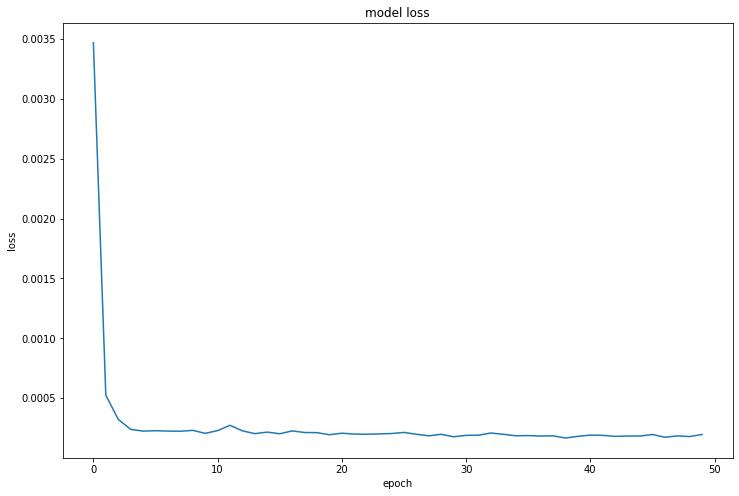

In [1164]:
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [1165]:
trainPredictPlot = np.zeros(shape=dataset1.shape)
trainPredictPlot[:,:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset1.shape[0], 1))
# 使用之前的look_back+1个的数据预测当前的1个数据，所以从第look_back+1个才开始预测
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [1166]:
testPredictPlot = np.zeros(shape=dataset1.shape)
testPredictPlot[:,:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset1.shape[0], 1))
testPredictPlot[(len(trainPredict)+look_back)+look_back: len(dataset1), :] = testPredict

In [1167]:
dataset

array([[0.16198395, 0.02116837],
       [0.18257929, 0.04000333],
       [0.18598206, 0.04007602],
       ...,
       [0.68306106, 0.06827528],
       [0.66951095, 0.09783383],
       [0.69096852, 0.06223058]])

In [1168]:
dataset1 = scaler.inverse_transform(dataset)[:,0].reshape(-1,1)
print(dataset1)

[[13657.200195]
 [14982.099609]
 [15201.      ]
 ...
 [47178.125   ]
 [46306.445313]
 [47686.8125  ]]


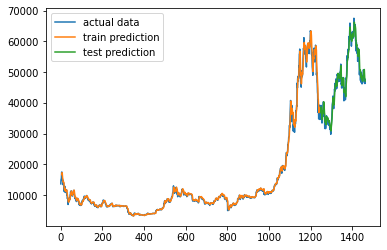

In [1169]:
plt.plot(dataset1,label = 'actual data')
plt.plot(trainPredictPlot,label = 'train prediction')
plt.plot(testPredictPlot,label = 'test prediction')
plt.legend()

In [1170]:
# sum_t = 0
# testY = testY.reshape(-1,)
# testPredict = testPredict.reshape(-1,)
# print(testY.shape)
# print(testPredict.shape)
# for i in range(len(testY)):
#     testY[i] = testY[i] / (max(testY) - min(testY))
#     testPredict[i] = testPredict[i] / (max(testPredict) - min(testPredict))
# for i in range(len(testY)):
#     sum_t += (testPredict[i] - testY[i])**2
# rmse = (sum_t / len(testPredict))**0.5
# rmse

In [1171]:
import numpy as np
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
#调用

# mean_absolute_error(testY,testPredict)
np.sqrt(mean_squared_error(testY,testPredict))  # RMSE就是对MSE开方即可



1869.1168825913662

In [1172]:
r2_score(testY,testPredict)

0.9635118715530732

In [1173]:
#  MAPE和SMAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

#  调用
mape(testY, testPredict)


3.1815809632323484

In [1174]:
dataset1

array([[13657.200195],
       [14982.099609],
       [15201.      ],
       ...,
       [47178.125   ],
       [46306.445313],
       [47686.8125  ]])

In [1175]:
dataset

array([[0.16198395, 0.02116837],
       [0.18257929, 0.04000333],
       [0.18598206, 0.04007602],
       ...,
       [0.68306106, 0.06827528],
       [0.66951095, 0.09783383],
       [0.69096852, 0.06223058]])